In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [2]:
# Load the faces datasets
data = fetch_olivetti_faces()
targets = data.target

data = data.images.reshape((len(data.images), -1))
train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people

downloading Olivetti faces from http://cs.nyu.edu/~roweis/data/olivettifaces.mat to /root/scikit_learn_data


In [38]:
# Test on a subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]

n_pixels = data.shape[1]
X_train = train[:, :np.ceil(0.5 * n_pixels)]  # Upper half of the faces
y_train = train[:, np.floor(0.5 * n_pixels):]  # Lower half of the faces
X_test = test[:, :np.ceil(0.5 * n_pixels)]
y_test = test[:, np.floor(0.5 * n_pixels):]



/home/bin_yin/mars_study_group/py3project/lib/python3.5/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/bin_yin/mars_study_group/py3project/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/bin_yin/mars_study_group/py3project/lib/python3.5/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/bin_yin/mars_study_group/py3project/lib/python3.5/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [39]:
train.shape

(300, 4096)

In [40]:
X_train.shape

(300, 2048)

In [41]:
y_train.shape

(300, 2048)

In [42]:
X_test.shape

(5, 2048)

In [43]:
# training model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
# predict
y_test_predict = model.predict(X_test)

i = 1
true_face = np.hstack((X_test[i], y_test[i]))
predict_face = np.hstack((X_test[i], y_test_predict[i]))

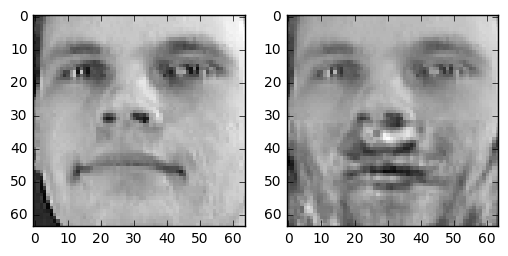

In [45]:
# show predicted face
sub = plt.subplot(1,2,1)
sub.imshow(true_face.reshape((64, 64)),
               cmap=plt.cm.gray,
               interpolation="nearest")

sub = plt.subplot(1,2,2)
sub.imshow(predict_face.reshape((64, 64)),
               cmap=plt.cm.gray,
               interpolation="nearest")
plt.show()